<a href="https://colab.research.google.com/github/TosinSDGs/TosinSDGs/blob/main/NPL_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting non-performing loans (npl) using historical debt data from 1996 to 2022

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
npl_data = pd.read_excel('real_sector v3.xlsx', header=0)

In [ ]:
print(npl_data.columns.tolist())

['Template', 'Partner ID', 'Partner Name', 'Partner Country', 'Partner Region', 'Partner Industry', 'Partner DeptDiv', 'Partner Portfolio Manager', 'Partner IGSC Lvl1', 'Partner IGSC Lvl2', 'Partner IGSC Lvl3', 'Partner Sector', 'Active Portfolio Indicator', 'Statement Months', 'Statement Date', 'Statement Type', 'Consolidation', 'Auditor', 'Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities', 'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense', 'Net Income', 'Financial Debt (TS)', 'Net Debt', 'EBITDA (TS)', 'Current Ratio', 'Current Ratio excl prepaids [TS]', 'Quick Ratio', 'Liabilities to Net Worth', 'Liabilities to Assets', 'Debt to Net Worth', 'Net Worth to Total Assets', 'Interest Coverage', 'DSCR (TS)', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin', 'ROAA', 'Net Trade Receivable Days', 'Inve

In [ ]:
npl_data = npl_data.drop(columns=["Partner Country", "Partner DeptDiv", "Partner Portfolio Manager", "Partner IGSC Lvl1", "Partner IGSC Lvl2", "Partner IGSC Lvl3", "Partner Sector", "Auditor", "Consolidation", "Statement Type",  "Inventory Days", "Accounts Payable Days", "Month End Date", "Last Statement Date", 'Z-Score (EBITDA)', 'Z-Score (Operating Profit)', "Template", "Partner Name"])

In [ ]:
npl_data = npl_data[~npl_data['Partner Industry'].isin(['UNK', 'CDF', 'FIG', ' '])]

In [ ]:
# perform one-hot encoding using get_dummies()
npl_data = pd.get_dummies(npl_data, columns=['Partner Region', 'Partner Industry'])

In [ ]:
print(npl_data.shape)

(59838, 64)


In [ ]:
#using npl dummy
npl_data["NPL"] = npl_data["NPL_PRIN"].apply(lambda x: 1 if pd.notnull(x) and x != 0 else 0)

In [ ]:
print(npl_data.columns.tolist())

['Partner ID', 'Active Portfolio Indicator', 'Statement Months', 'Statement Date', 'Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities', 'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense', 'Net Income', 'Financial Debt (TS)', 'Net Debt', 'EBITDA (TS)', 'Current Ratio', 'Current Ratio excl prepaids [TS]', 'Quick Ratio', 'Liabilities to Net Worth', 'Liabilities to Assets', 'Debt to Net Worth', 'Net Worth to Total Assets', 'Interest Coverage', 'DSCR (TS)', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin', 'ROAA', 'Net Trade Receivable Days', 'Asset Turnover', 'DEBT_CMTD', 'LOSS_RSV', 'LOAN_OUTSTANDING', 'TOT_ARR', 'NPL_PRIN', 'FIRST_NPL_DATE', 'Earliest Statement Date', 'CR NUM', 'CRR NUM', 'WC to Assets Ratio', 'RE to Assets Ratio', 'EBITDA to Assets Ratio (annualized)', 'EBIT to Assets Ratio (annuali

In [ ]:
# Convert the date column to a pandas DatetimeIndex object
npl_data['Statement Date'] = pd.to_datetime(npl_data['Statement Date'])

# Extract the year and quarter information from the date column
npl_data['year'] = npl_data['Statement Date'].dt.year
npl_data['quarter'] = npl_data['Statement Date'].dt.quarter

# Create a PeriodIndex object from the 'year' and 'quarter' columns
npl_data['period'] = pd.PeriodIndex(year=npl_data['year'], quarter=npl_data['quarter'])

# Add period column to the dataframe
npl_data['individual_id'] = npl_data['Partner ID']
npl_data['quarter'] = npl_data['quarter']
npl_data['year'] = npl_data['year']
npl_data = npl_data.loc[:, ['individual_id', 'period', 'quarter', 'year'] + npl_data.columns[:-4].tolist()]

# Sort the index by individual, year, quarter and period
npl_data = npl_data.sort_values(by=['individual_id', 'year', 'quarter', 'period']).reset_index(drop=True)


In [ ]:
print(npl_data.head(5))

   individual_id  period  quarter  year  Partner ID  \
0             24  1998Q2        2  1998          24   
1             24  1999Q2        2  1999          24   
2             24  2000Q1        1  2000          24   
3             24  2000Q2        2  2000          24   
4             24  2001Q1        1  2001          24   

  Active Portfolio Indicator  Statement Months Statement Date  \
0                          N                12     1998-06-30   
1                          N                12     1999-06-30   
2                          N                 3     2000-03-31   
3                          N                12     2000-06-30   
4                          N                 3     2001-03-30   

   Total Cash and Cash Equivalents  Total Current Assets  ...  \
0                       40600000.0           350100000.0  ...   
1                       30400000.0           295600000.0  ...   
2                        7352000.0           188309000.0  ...   
3                 

In [ ]:
print(npl_data.columns.tolist())

['individual_id', 'period', 'quarter', 'year', 'Partner ID', 'Active Portfolio Indicator', 'Statement Months', 'Statement Date', 'Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities', 'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense', 'Net Income', 'Financial Debt (TS)', 'Net Debt', 'EBITDA (TS)', 'Current Ratio', 'Current Ratio excl prepaids [TS]', 'Quick Ratio', 'Liabilities to Net Worth', 'Liabilities to Assets', 'Debt to Net Worth', 'Net Worth to Total Assets', 'Interest Coverage', 'DSCR (TS)', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin', 'ROAA', 'Net Trade Receivable Days', 'Asset Turnover', 'DEBT_CMTD', 'LOSS_RSV', 'LOAN_OUTSTANDING', 'TOT_ARR', 'NPL_PRIN', 'FIRST_NPL_DATE', 'Earliest Statement Date', 'CR NUM', 'CRR NUM', 'WC to Assets Ratio', 'RE to Assets Ratio', 'EBITDA to Assets Ratio

In [ ]:
npl_data = npl_data.drop(columns=['Earliest Statement Date', 'FIRST_NPL_DATE', 'Partner ID', 'period', 'CRR NUM', 'TOT_ARR', 'NPL_PRIN', 'LOSS_RSV', 'Statement Date'])

In [ ]:
print(npl_data.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'Statement Months', 'Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities', 'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense', 'Net Income', 'Financial Debt (TS)', 'Net Debt', 'EBITDA (TS)', 'Current Ratio', 'Current Ratio excl prepaids [TS]', 'Quick Ratio', 'Liabilities to Net Worth', 'Liabilities to Assets', 'Debt to Net Worth', 'Net Worth to Total Assets', 'Interest Coverage', 'DSCR (TS)', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin', 'ROAA', 'Net Trade Receivable Days', 'Asset Turnover', 'DEBT_CMTD', 'LOAN_OUTSTANDING', 'CR NUM', 'WC to Assets Ratio', 'RE to Assets Ratio', 'EBITDA to Assets Ratio (annualized)', 'EBIT to Assets Ratio (annualized)', 'Operating Profit to Assets Ratio (annualized)', 'Equity to Liabilities Ratio', 

In [ ]:
npl_data = npl_data.drop(columns=['Net Trade Receivable Days'])

In [ ]:
print(npl_data.shape)

(59838, 59)


Test for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

# define the list of columns to perform ADF test on
cols = ['Total Cash and Cash Equivalents', 'Total Assets', 'Total Liabilities', 'Retained Earnings', 'Total Equity',
        'Net Revenues', 'Operating Profit', 'Interest Expense', 'Financial Debt (TS)', 'Net Debt', 'Current Ratio',
        'Debt to Net Worth', 'DSCR (TS)', 'Operating Profit Margin', 'ROAA', 'Asset Turnover', 'DEBT_CMTD', 'LOSS_RSV',
        'LOAN_OUTSTANDING', 'TOT_ARR', 'NPL_PRIN', 'CR NUM', 'CRR NUM', 'WC to Assets Ratio', 'RE to Assets Ratio',
        'EBIT to Assets Ratio (annualized)', 'Equity to Liabilities Ratio', 'Z-Score (EBIT)', 'Rev_Total_Assest',
        'NPL_DEBT_CMTD', 'NPL Days', 'NPL']

# loop through the columns and perform ADF test
for col in cols:
    result = adfuller(npl_data[col].dropna())
    print(f'ADF Statistic for {col}: {result[0]:.3f}')
    print(f'p-value for {col}: {result[1]:.3f}')
    print(f'Critical values for {col}:')
    for key, value in result[4].items():
        print(f'   {key}: {value:.3f}')
    print('\n')


In [ ]:
# loop through unique years in the data
for yr in npl_data['year'].unique():
    # subset data for the year
    yr_data = npl_data[npl_data['year'] == yr]

    # loop through columns to test for stationarity
    for col in cols:
        # compute the augmented Dickey-Fuller test for the column
        result = adfuller(yr_data[col])

        # print the results of the test
        print(f'Year {yr}, Column {col}:')
        print('ADF Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print('\t%s: %.3f' % (key, value))
        print()


Stationarity in Panel format

In [ ]:
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS
import linearmodels.panel as pd

# Make a copy of npl_data
npl_data_copy = npl_data.copy()

# Set the index of npl_data_copy as the individual and time variables
npl_data_copy = npl_data_copy.set_index(['individual_id', 'year', 'quarter'])

# Define the dependent variable
dependent_var = 'NPL'

# Define the independent variables
independent_vars = ['Total Cash and Cash Equivalents', 'Total Assets', 'Total Liabilities', 'Retained Earnings', 'Total Equity',
                    'Net Revenues', 'Operating Profit', 'Interest Expense', 'Financial Debt (TS)', 'Net Debt', 'EBITDA (TS)',
                    'Current Ratio', 'Debt to Net Worth', 'DSCR (TS)', 'Operating Profit Margin', 'ROAA', 'Asset Turnover',
                    'DEBT_CMTD', 'LOSS_RSV', 'LOAN_OUTSTANDING', 'TOT_ARR', 'NPL_PRIN', 'CR NUM', 'CRR NUM', 'WC to Assets Ratio',
                    'RE to Assets Ratio', 'EBIT to Assets Ratio (annualized)', 'Equity to Liabilities Ratio', 'Z-Score (EBIT)',
                    'Rev_Total_Assest', 'NPL_DEBT_CMTD']

# Run the pooled OLS regression and save the results
regression_results = PooledOLS(npl_data_copy[dependent_var], npl_data_copy[independent_vars]).fit(cov_type='clustered', cluster_entity=True)

# Perform the Breusch-Pagan LM test and save the results
bp_results = regression_results.diagnostic.het_breuschpagan()

# Print the results
print('Breusch-Pagan LM test results:')
print('LM statistic:', bp_results[0])
print('p-value:', bp_results[1])
print('f-value:', bp_results[2])
print('f p-value:', bp_results[3])


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from scipy.stats import pearsonr

# Define the columns of interest
columns_of_interest = ['Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities',
                       'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense',
                       'Net Income','Financial Debt (TS)', 'Net Debt', 'Current Ratio', 'Quick Ratio', 'Debt to Net Worth', 'Net Worth to Total Assets',
                       'DSCR (TS)', 'Interest Coverage', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin',
                       'ROAA', 'Asset Turnover', 'DEBT_CMTD', 'LOAN_OUTSTANDING', 'WC to Assets Ratio', 'RE to Assets Ratio',
                       'EBIT to Assets Ratio (annualized)', 'Equity to Liabilities Ratio', 'Z-Score (EBIT)', 'Rev_Total_Assest', 'NPL_DEBT_CMTD']

# Separate the target variable from the features
X1 = npl_data[columns_of_interest]
y1 = npl_data['NPL']

# Drop rows with missing values in X1 and y1
X1_cleaned = X1.dropna()
y1_cleaned = y1[X1_cleaned.index]

# Correlation analysis
corr_scores = []
for column in X1_cleaned.columns:
    corr_score, _ = pearsonr(X1_cleaned[column], y1_cleaned)
    corr_scores.append(corr_score)
corr_scores = np.abs(corr_scores)
corr_features = X1_cleaned.columns[corr_scores >= 0.05].tolist()  # Convert to list

# Mutual information
mi_scores = mutual_info_classif(X1_cleaned, y1_cleaned)
mi_features = X1_cleaned.columns[mi_scores >= 0.02]  # Select features with mutual information score >= 0.1


In [ ]:
print(X1_cleaned.shape)
print(y1_cleaned.shape)

(18940, 36)
(18940,)


In [ ]:
print(corr_features)

['Net Worth to Total Assets', 'DEBT_CMTD', 'WC to Assets Ratio', 'RE to Assets Ratio', 'Equity to Liabilities Ratio', 'NPL_DEBT_CMTD']


In [ ]:
print(mi_features)

Index(['Total Assets', 'Retained Earnings', 'Total Equity', 'Operating Profit',
       'Current Ratio', 'Quick Ratio', 'Debt to Net Worth',
       'Net Worth to Total Assets', 'Interest Coverage', 'DEBT_CMTD',
       'LOAN_OUTSTANDING', 'WC to Assets Ratio', 'RE to Assets Ratio',
       'Equity to Liabilities Ratio', 'Z-Score (EBIT)', 'NPL_DEBT_CMTD'],
      dtype='object')


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['Total Cash and Cash Equivalents', 'Total Current Assets', 'Total Assets', 'Total Current Liabilities', 'Total Liabilities',
                        'Retained Earnings', 'Total Equity', 'Net Revenues', 'Operating Profit', 'Interest Expense', 'Interest Income', 'Income Tax Expense',
                        'Net Income','Financial Debt (TS)', 'Net Debt', 'Current Ratio', 'Quick Ratio', 'Debt to Net Worth', 'Net Worth to Total Assets',
                        'DSCR (TS)', 'Interest Coverage', 'Net Debt to EBITDA', 'EBITDA Margin', 'Operating Profit Margin', 'Net Profit Margin',
                        'ROAA', 'Asset Turnover', 'DEBT_CMTD', 'LOAN_OUTSTANDING', 'WC to Assets Ratio', 'RE to Assets Ratio',
                        'EBIT to Assets Ratio (annualized)', 'Equity to Liabilities Ratio', 'Z-Score (EBIT)', 'Rev_Total_Assest', 'NPL_DEBT_CMTD']

# Create a new DataFrame to store the normalized values
npl_c = npl_data.copy()

# Normalize the selected columns and save the results to new columns in npl_c
for column in columns_to_normalize:
    column_normalized = scaler.fit_transform(npl_data[[column]])
    npl_c[column + '_n'] = column_normalized


In [ ]:
npl_c[['Total Cash and Cash Equivalents', 'Total Assets', 'Total Cash and Cash Equivalents_n', 'Total Assets_n']].head(5)

,Total Cash and Cash Equivalents,Total Assets,Total Cash and Cash Equivalents_n,Total Assets_n
0,40600000.0,1.406100e+09,0.000009,0.000002
1,30400000.0,1.178400e+09,0.000008,0.000002
2,7352000.0,7.439960e+08,0.000008,0.000001
3,9126000.0,8.071780e+08,0.000008,0.000001
4,5175000.0,8.130030e+08,0.000008,0.000001


In [ ]:
# Drop the unnormalized columns
npl_c.drop(columns_to_normalize, axis=1, inplace=True)

In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'Statement Months', 'EBITDA (TS)', 'Current Ratio excl prepaids [TS]', 'Liabilities to Net Worth', 'Liabilities to Assets', 'CR NUM', 'EBITDA to Assets Ratio (annualized)', 'Operating Profit to Assets Ratio (annualized)', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Current Assets_n', 'Total Assets_n', 'Total Current Liabilities_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Financial Debt (TS)_n', 'Net Debt_n', 'Current Ratio_n', 'Quick Ratio_n', 'Debt to Net Worth_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'Net Debt to

In [ ]:
print(npl_c.shape)

(59838, 59)


In [ ]:
npl_c = npl_c.drop(columns=['EBITDA (TS)', 'Current Ratio excl prepaids [TS]', 'Liabilities to Net Worth', 'Liabilities to Assets', 'EBITDA to Assets Ratio (annualized)', 'Operating Profit to Assets Ratio (annualized)'])

In [ ]:
print(npl_c.shape)

(59838, 53)


In [ ]:
npl_c = npl_c.drop(columns=['Financial Debt (TS)_n', 'Z-Score (EBIT)_n', 'Operating Profit Margin_n', 'Total Assets_n', 'Debt to Net Worth_n'])

In [ ]:
print(npl_c.shape)

(59838, 48)


In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'Statement Months', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Current Assets_n', 'Total Current Liabilities_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Quick Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'Net Debt to EBITDA_n', 'EBITDA Margin_n', 'Net Profit Margin_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest

In [ ]:
npl_c = npl_c.drop(columns=['Total Current Assets_n', 'Total Current Liabilities_n', 'Quick Ratio_n', 'Net Debt to EBITDA_n', 'EBITDA Margin_n', 'Net Profit Margin_n'])

In [ ]:
print(npl_c.shape)

(59838, 42)


In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'Statement Months', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
# Calculate the total number of individuals
total_individuals = len(npl_c['individual_id'].unique())

# Calculate the number of individuals with NPL as 1
npl_1_individuals = npl_c[npl_c['NPL'] == 1]['individual_id'].nunique()

# Calculate the percentage of individuals with NPL as 1
npl_1_c = (npl_1_individuals / total_individuals) * 100

# Print the result
print(f"Percentage of individuals with NPL as 1: {npl_1_c:.2f}%")

Percentage of individuals with NPL as 1: 9.61%


In [ ]:
# Filter the data to only include rows where NPL is equal to 1
npl_1_data = npl_c[npl_c['NPL'] == 1]

# Filter the data to only include rows where NPL is equal to 0
npl_0_data = npl_c[npl_c['NPL'] == 0]

# Calculate the differences in the columns between the two filtered DataFrames
diff = npl_1_data.mean() - npl_0_data.mean()

# Print the resulting Series
print(diff)

Trying to see if SMOTE and RUS can address data imbalance and data overlap

In [ ]:
#combining both oversampling and undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X_crd = npl_c.drop('NPL', axis=1)
y_crd = npl_c['NPL']

# Split the data into a training set and a test set, with a 80/20 split
X_train_crd, X_test_crd, y_train_crd, y_test_crd = train_test_split(X_crd, y_crd, test_size=0.2, random_state=42, stratify=y_crd)

# Apply RUS to undersample the majority class in the training set
rus = RandomUnderSampler(random_state=42)
X_train_crd, y_train_crd = rus.fit_resample(X_train_crd, y_train_crd)

In [ ]:
# Print the class distribution in the resampled training set
print('Class distribution in the resampled training set:', y_train_crd.value_counts())

# Print the class distribution in the test set
print('Class distribution in the test set:', y_test_crd.value_counts())

Class distribution in the resampled training set: 0    1923
1    1923
Name: NPL, dtype: int64
Class distribution in the test set: 0    11487
1      481
Name: NPL, dtype: int64


In [ ]:
# Print the shape of the train and test sets
print('X_train shape:', X_train_crd.shape)
print('X_test shape:', X_test_crd.shape)
print('y_train shape:', y_train_crd.shape)
print('y_test shape:', y_test_crd.shape)

X_train shape: (3846, 39)
X_test shape: (11968, 39)
y_train shape: (3846,)
y_test shape: (11968,)


In [ ]:
print(X_test_crd)

       individual_id  quarter  year  CR NUM  Partner Region_CAF  \
41017         723965        1  2015     9.0                   0   
53468        1023435        4  2018    10.0                   0   
14433          54246        3  2020    12.0                   0   
45664         769144        4  2016     NaN                   0   
36192         659784        4  2014    14.0                   0   
...              ...      ...   ...     ...                 ...   
13426          53942        4  2004     NaN                   0   
23806         565457        2  2012     7.0                   0   
7923           51532        2  2015    14.0                   0   
54103        1025978        2  2020     NaN                   0   
44932         764086        3  2016    10.0                   0   

       Partner Region_CAT  Partner Region_CEA  Partner Region_CEU  \
41017                   0                   0                   0   
53468                   0                   0            

Building the model using variants of gradient boosting algorithm

In [ ]:
from scipy import stats
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib

In [ ]:
# HistGradient Boosting model
hgb_model_crd = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hgb_model_crd.fit(X_train_crd, y_train_crd)
hgb_pred_crd = hgb_model_crd.predict(X_test_crd)
joblib.dump(hgb_model_crd, 'hgb_model_crd.joblib')

# XGBoost Classifier model
xgb_model_crd = XGBClassifier(n_estimators=100, random_state=42)
xgb_model_crd.fit(X_train_crd, y_train_crd)
xgb_pred_crd = xgb_model_crd.predict(X_test_crd)
joblib.dump(xgb_model_crd, 'xgb_model_crd.joblib')

# LightGBM Classifier model
lgbm_model_crd = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model_crd.fit(X_train_crd, y_train_crd)
lgbm_pred_crd = lgbm_model_crd.predict(X_test_crd)
joblib.dump(lgbm_model_crd, 'lgbm_model_crd.joblib')

# CatBoost Classifier model
cat_model_crd = CatBoostClassifier(n_estimators=100, random_state=42, silent=True)
cat_model_crd.fit(X_train_crd, y_train_crd)
cat_pred_crd = cat_model_crd.predict(X_test_crd)
joblib.dump(cat_model_crd, 'cat_model_crd.joblib')

# Ensemble model
ensemble_model_crd = VotingClassifier(estimators=[
    ('hgb', hgb_model_crd), ('xgb', xgb_model_crd), ('lgbm', lgbm_model_crd), ('cat', cat_model_crd)], voting='soft')
ensemble_model_crd.fit(X_train_crd, y_train_crd)
ensemble_pred_crd = ensemble_model_crd.predict(X_test_crd)
joblib.dump(ensemble_model_crd, 'ensemble_model_crd.joblib')


['ensemble_model_crd.joblib']

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Create the stratified k-fold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
hgb_crd = cross_validate(hgb_model_crd, X_train_crd, y_train_crd, cv=stratified_kfold, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {hgb_crd["train_score"][i]:.4f} ± {hgb_crd["train_score"].std():.4f}')
    print(f'Testing score: {hgb_crd["test_score"][i]:.4f} ± {hgb_crd["test_score"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {hgb_crd["train_score"].mean():.4f} ± {hgb_crd["train_score"].std():.4f}')
print(f'Mean testing score: {hgb_crd["test_score"].mean():.4f} ± {hgb_crd["test_score"].std():.4f}')


In [ ]:
import matplotlib.pyplot as plt

# Create lists of mean and standard deviation scores for training and testing
train_scores_crd = hgb_crd['train_score']
test_scores_crd = hgb_crd['test_score']
train_mean_crd = train_scores_crd.mean()
test_mean_crd = test_scores_crd.mean()
train_std_crd = train_scores_crd.std()
test_std_crd = test_scores_crd.std()

# Create x-axis labels for each fold
x_labels = [f'Fold {i+1}' for i in range(5)]

# Create bar chart with error bars
fig, ax = plt.subplots()
ax.bar(x_labels, train_scores_crd, yerr=train_std_crd, label='Training')
ax.bar(x_labels, test_scores_crd, yerr=test_std_crd, label='Testing')
ax.set_xlabel('Fold')
ax.set_ylabel('Score')
ax.set_ylim([0.8, 1.0])
ax.legend()
ax.set_title('HistGradient Boosting: Cross-validation scores')
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score, auc
from imblearn.metrics import geometric_mean_score

# Load the trained models
hgb_model_crd = joblib.load('hgb_model_crd.joblib')
xgb_model_crd = joblib.load('xgb_model_crd.joblib')
lgbm_model_crd = joblib.load('lgbm_model_crd.joblib')
cat_model_crd = joblib.load('cat_model_crd.joblib')
ensemble_model_crd = joblib.load('ensemble_model_crd.joblib')

# Predict probabilities for positive class
hgb_pred_proba_crd = hgb_model_crd.predict_proba(X_test_crd)[:, 1]
xgb_pred_proba_crd = xgb_model_crd.predict_proba(X_test_crd)[:, 1]
lgbm_pred_proba_crd = lgbm_model_crd.predict_proba(X_test_crd)[:, 1]
cat_pred_proba_crd = cat_model_crd.predict_proba(X_test_crd)[:, 1]
ensemble_pred_proba_crd = ensemble_model_crd.predict_proba(X_test_crd)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_crd, hgb_pred_proba_crd)
hgb_pr_auc = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_crd, xgb_pred_proba_crd)
xgb_pr_auc = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_crd, lgbm_pred_proba_crd)
lgbm_pr_auc = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_crd, cat_pred_proba_crd)
cat_pr_auc = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_crd, ensemble_pred_proba_crd)
ensemble_pr_auc = auc(recall, precision)


In [ ]:
# Print the evaluation metrics
print('PR AUC Scores:')
print('HistGradient Boosting:', hgb_pr_auc)
print('XGBoost:', xgb_pr_auc)
print('LightGBM:', lgbm_pr_auc)
print('CatBoost:', cat_pr_auc)
print('Ensemble:', ensemble_pr_auc)
print('')

PR AUC Scores:
HistGradient Boosting: 0.7774780497008129
XGBoost: 0.7799380695332583
LightGBM: 0.7781219213415904
CatBoost: 0.7968975748246494
Ensemble: 0.8033806218614915



In [ ]:
from sklearn.metrics import matthews_corrcoef
hgb_mcc = matthews_corrcoef(y_test_crd, hgb_pred_crd)
xgb_mcc = matthews_corrcoef(y_test_crd, xgb_pred_crd)
lgbm_mcc = matthews_corrcoef(y_test_crd, lgbm_pred_crd)
cat_mcc = matthews_corrcoef(y_test_crd, cat_pred_crd)
ensemble_mcc = matthews_corrcoef(y_test_crd, ensemble_pred_crd)


In [ ]:
print('Matthews Correlation Coefficient:')
print('HistGradient Boosting:', hgb_mcc)
print('XGBoost:', xgb_mcc)
print('LightGBM:', lgbm_mcc)
print('CatBoost:', cat_mcc)
print('Ensemble:', ensemble_mcc)
print('')

Matthews Correlation Coefficient:
HistGradient Boosting: 0.5457255914966886
XGBoost: 0.5360221116480683
LightGBM: 0.5358431032386407
CatBoost: 0.5346431354754972
Ensemble: 0.5449366487824467



In [ ]:
# Calculate Balanced Accuracy
hgb_balanced_acc = balanced_accuracy_score(y_test_crd, hgb_pred_crd)
xgb_balanced_acc = balanced_accuracy_score(y_test_crd, xgb_pred_crd)
lgbm_balanced_acc = balanced_accuracy_score(y_test_crd, lgbm_pred_crd)
cat_balanced_acc = balanced_accuracy_score(y_test_crd, cat_pred_crd)
ensemble_balanced_acc = balanced_accuracy_score(y_test_crd, ensemble_pred_crd)

In [ ]:
print('Balanced Accuracy:')
print('HistGradient Boosting:', hgb_balanced_acc)
print('XGBoost:', xgb_balanced_acc)
print('LightGBM:', lgbm_balanced_acc)
print('CatBoost:', cat_balanced_acc)
print('Ensemble:', ensemble_balanced_acc)
print('')

Balanced Accuracy:
HistGradient Boosting: 0.9377873061602495
XGBoost: 0.9309844428674411
LightGBM: 0.9292971879809174
CatBoost: 0.9315451417828018
Ensemble: 0.9351476051658867



In [ ]:
# Calculate Geometric Mean
hgb_geo_mean = geometric_mean_score(y_test_crd, hgb_pred_crd)
xgb_geo_mean = geometric_mean_score(y_test_crd, xgb_pred_crd)
lgbm_geo_mean = geometric_mean_score(y_test_crd, lgbm_pred_crd)
cat_geo_mean = geometric_mean_score(y_test_crd, cat_pred_crd)
ensemble_geo_mean = geometric_mean_score(y_test_crd, ensemble_pred_crd)

In [ ]:
print('Geometric Mean:')
print('HistGradient Boosting:', hgb_geo_mean)
print('XGBoost:', xgb_geo_mean)
print('LightGBM:', lgbm_geo_mean)
print('CatBoost:', cat_geo_mean)
print('Ensemble:', ensemble_geo_mean)
print('')

Geometric Mean:
HistGradient Boosting: 0.9376768083784981
XGBoost: 0.930943562207754
LightGBM: 0.9292761453037365
CatBoost: 0.9314888277522145
Ensemble: 0.9350852577620347



In [ ]:
# Calculate F1 score
hgb_f1 = f1_score(y_test_crd, hgb_pred_crd)
xgb_f1 = f1_score(y_test_crd, xgb_pred_crd)
lgbm_f1 = f1_score(y_test_crd, lgbm_pred_crd)
cat_f1 = f1_score(y_test_crd, cat_pred_crd)
ensemble_f1 = f1_score(y_test_crd, ensemble_pred_crd)

In [ ]:
print('F1 Score:')
print('HistGradient Boosting:', hgb_f1)
print('XGBoost:', xgb_f1)
print('LightGBM:', lgbm_f1)
print('CatBoost:', cat_f1)
print('Ensemble:', ensemble_f1)


F1 Score:
HistGradient Boosting: 0.503573391973612
XGBoost: 0.4950711938663746
LightGBM: 0.49586776859504134
CatBoost: 0.49292709466811746
Ensemble: 0.5041551246537396


Modeling with stratified sampling using partner_id

In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
npl_sp = npl_c.drop(columns=['Active Portfolio Indicator'])

In [ ]:
from sklearn.model_selection import train_test_split

# Extract the unique individual_ids from the data
unique_ids = npl_sp['individual_id'].unique()

# Separate the features (X) and target variable (y)
X_sp = npl_sp.drop('NPL', axis=1)
y_sp = npl_sp['NPL']

# Filter the data based on the unique individual_ids
X_sp_filtered = X_sp[X_sp['individual_id'].isin(unique_ids)]
y_sp_filtered = y_sp[X_sp['individual_id'].isin(unique_ids)]

# Split the filtered data into train and test sets using stratified sampling
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sp_filtered, y_sp_filtered, test_size=0.2, stratify=y_sp_filtered, random_state=42)


In [ ]:
"""The above is useful for splitting the data into training and testing sets for a supervised machine learning
task, while ensuring that the same individual does not appear in both sets and that the target variable is evenly
distributed between the sets"""

In [ ]:
# Print the sizes of the train and test sets
print("Train set size:", len(y_sp))
print("Test set size:", len(X_sp))

In [ ]:
# Print the sizes of the train and test sets
print("Train set size:", y_sp.shape)
print("Test set size:", X_sp.shape)

In [ ]:
# Print the shape of the train and test sets
print('X_train shape:', X_train_sp.shape)
print('X_test shape:', X_test_sp.shape)
print('y_train shape:', y_train_sp.shape)
print('y_test shape:', y_test_sp.shape)

X_train shape: (47870, 39)
X_test shape: (11968, 39)
y_train shape: (47870,)
y_test shape: (11968,)


In [ ]:
from scipy import stats
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import joblib

In [ ]:
# HistGradient Boosting model
hgb_model_sp = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hgb_model_sp.fit(X_train_sp, y_train_sp)
hgb_pred_sp = hgb_model_sp.predict(X_test_sp)
joblib.dump(hgb_model_sp, 'hgb_model_sp.joblib')

# XGBoost Classifier model
xgb_model_sp = XGBClassifier(n_estimators=100, random_state=42)
xgb_model_sp.fit(X_train_sp, y_train_sp)
xgb_pred_sp = xgb_model_sp.predict(X_test_sp)
joblib.dump(xgb_model_sp, 'xgb_model_sp.joblib')

# LightGBM Classifier model
lgbm_model_sp = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model_sp.fit(X_train_sp, y_train_sp)
lgbm_pred_sp = lgbm_model_sp.predict(X_test_sp)
joblib.dump(lgbm_model_sp, 'lgbm_model_sp.joblib')

# CatBoost Classifier model
cat_model_sp = CatBoostClassifier(n_estimators=100, random_state=42, silent=True)
cat_model_sp.fit(X_train_sp, y_train_sp)
cat_pred_sp = cat_model_sp.predict(X_test_sp)
joblib.dump(cat_model_sp, 'cat_model_sp.joblib')

# Ensemble model
ensemble_model_sp = VotingClassifier(estimators=[
    ('hgb', hgb_model_sp), ('xgb', xgb_model_sp), ('lgbm', lgbm_model_sp), ('cat', cat_model_sp)], voting='soft')
ensemble_model_sp.fit(X_train_sp, y_train_sp)
ensemble_pred_sp = ensemble_model_sp.predict(X_test_sp)
joblib.dump(ensemble_model_sp, 'ensemble_model_sp.joblib')


['ensemble_model_sp.joblib']

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, matthews_corrcoef, balanced_accuracy_score, f1_score, auc
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt

In [ ]:
# Predict probabilities for positive class
hgb_pred_proba_sp = hgb_model_sp.predict_proba(X_test_sp)[:, 1]
xgb_pred_proba_sp = xgb_model_sp.predict_proba(X_test_sp)[:, 1]
lgbm_pred_proba_sp = lgbm_model_sp.predict_proba(X_test_sp)[:, 1]
cat_pred_proba_sp = cat_model_sp.predict_proba(X_test_sp)[:, 1]
ensemble_pred_proba_sp = ensemble_model_sp.predict_proba(X_test_sp)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_sp, hgb_pred_proba_sp)
hgb_pr_sp = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_sp, xgb_pred_proba_sp)
xgb_pr_sp = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_sp, lgbm_pred_proba_sp)
lgbm_pr_sp = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_sp, cat_pred_proba_sp)
cat_pr_sp = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_sp, ensemble_pred_proba_sp)
ensemble_pr_sp = auc(recall, precision)

# Compute F1 score
hgb_f1_sp = f1_score(y_test_sp, hgb_pred_sp)
xgb_f1_sp = f1_score(y_test_sp, xgb_pred_sp)
lgbm_f1_sp = f1_score(y_test_sp, lgbm_pred_sp)
cat_f1_sp = f1_score(y_test_sp, cat_pred_sp)
ensemble_f1_sp = f1_score(y_test_sp, ensemble_pred_sp)

# Calculate Balanced Accuracy
hgb_balanced_acc = balanced_accuracy_score(y_test_sp, hgb_pred_sp)
xgb_balanced_acc = balanced_accuracy_score(y_test_sp, xgb_pred_sp)
lgbm_balanced_acc = balanced_accuracy_score(y_test_sp, lgbm_pred_sp)
cat_balanced_acc = balanced_accuracy_score(y_test_sp, cat_pred_sp)
ensemble_balanced_acc = balanced_accuracy_score(y_test_sp, ensemble_pred_sp)

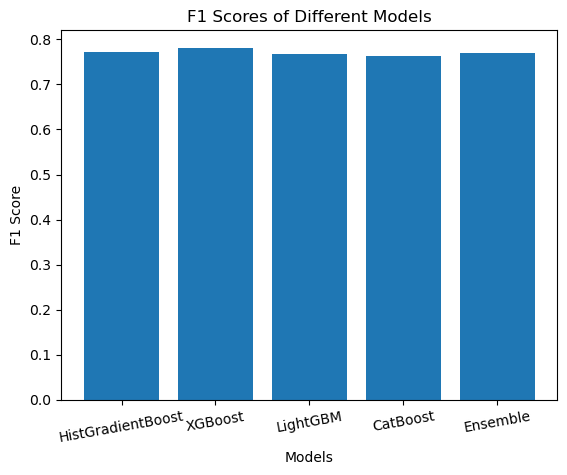

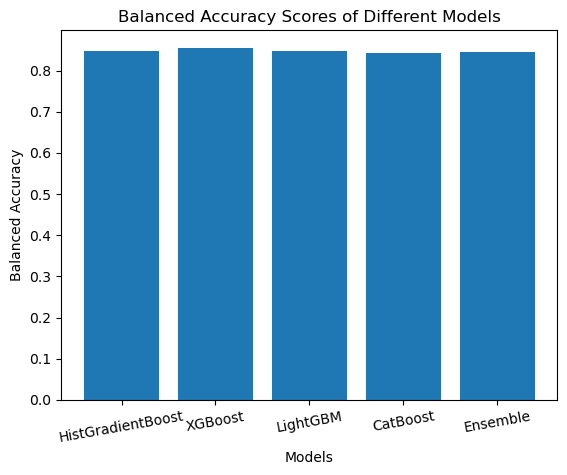

In [ ]:
# Define the models
models_sp = ['HistGradientBoost', 'XGBoost', 'LightGBM', 'CatBoost', 'Ensemble']

# F1 scores
f1_scores = [hgb_f1_sp, xgb_f1_sp, lgbm_f1_sp, cat_f1_sp, ensemble_f1_sp]
plt.bar(models_sp, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=10)  # Rotate the x-axis labels by 45 degrees
plt.show()

# Balanced accuracy scores
balanced_acc_scores = [hgb_balanced_acc, xgb_balanced_acc, lgbm_balanced_acc, cat_balanced_acc, ensemble_balanced_acc]
plt.bar(models_sp, balanced_acc_scores)
plt.xlabel('Models')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy Scores of Different Models')
plt.xticks(rotation=10)  # Rotate the x-axis labels by 45 degrees
plt.show()

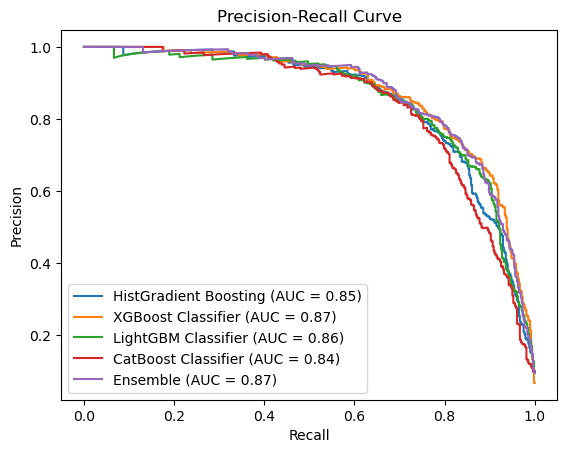

In [ ]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_sp, hgb_pred_proba_sp)
hgb_pr_sp = auc(recall, precision)
plt.plot(recall, precision, label='HistGradient Boosting (AUC = {:.2f})'.format(hgb_pr_sp))

precision, recall, _ = precision_recall_curve(y_test_sp, xgb_pred_proba_sp)
xgb_pr_sp = auc(recall, precision)
plt.plot(recall, precision, label='XGBoost Classifier (AUC = {:.2f})'.format(xgb_pr_sp))

precision, recall, _ = precision_recall_curve(y_test_sp, lgbm_pred_proba_sp)
lgbm_pr_sp = auc(recall, precision)
plt.plot(recall, precision, label='LightGBM Classifier (AUC = {:.2f})'.format(lgbm_pr_sp))

precision, recall, _ = precision_recall_curve(y_test_sp, cat_pred_proba_sp)
cat_pr_sp = auc(recall, precision)
plt.plot(recall, precision, label='CatBoost Classifier (AUC = {:.2f})'.format(cat_pr_sp))

precision, recall, _ = precision_recall_curve(y_test_sp, ensemble_pred_proba_sp)
ensemble_pr_sp = auc(recall, precision)
plt.plot(recall, precision, label='Ensemble (AUC = {:.2f})'.format(ensemble_pr_sp))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for HistGradient Boosting model
hgb_precision_sp = precision_score(y_test_sp, hgb_pred_sp)
hgb_recall_sp = recall_score(y_test_sp, hgb_pred_sp)
print("HistGradient Boosting Model:")
print("Precision:", hgb_precision_sp)
print("Recall:", hgb_recall_sp)
print()

# Calculate precision and recall for XGBoost Classifier model
xgb_precision_sp = precision_score(y_test_sp, xgb_pred_sp)
xgb_recall_sp = recall_score(y_test_sp, xgb_pred_sp)
print("XGBoost Classifier Model:")
print("Precision:", xgb_precision_sp)
print("Recall:", xgb_recall_sp)
print()

# Calculate precision and recall for LightGBM Classifier model
lgbm_precision_sp = precision_score(y_test_sp, lgbm_pred_sp)
lgbm_recall_sp = recall_score(y_test_sp, lgbm_pred_sp)
print("LightGBM Classifier Model:")
print("Precision:", lgbm_precision_sp)
print("Recall:", lgbm_recall_sp)
print()

# Calculate precision and recall for CatBoost Classifier model
cat_precision_sp = precision_score(y_test_sp, cat_pred_sp)
cat_recall_sp = recall_score(y_test_sp, cat_pred_sp)
print("CatBoost Classifier Model:")
print("Precision:", cat_precision_sp)
print("Recall:", cat_recall_sp)
print()

# Calculate precision and recall for Ensemble model
ensemble_precision_sp = precision_score(y_test_sp, ensemble_pred_sp)
ensemble_recall_sp = recall_score(y_test_sp, ensemble_pred_sp)
print("Ensemble Model:")
print("Precision:", ensemble_precision_sp)
print("Recall:", ensemble_recall_sp)


HistGradient Boosting Model:
Precision: 0.8535353535353535
Recall: 0.7027027027027027

XGBoost Classifier Model:
Precision: 0.86
Recall: 0.7151767151767152

LightGBM Classifier Model:
Precision: 0.850632911392405
Recall: 0.6985446985446986

CatBoost Classifier Model:
Precision: 0.8516624040920716
Recall: 0.6923076923076923

Ensemble Model:
Precision: 0.8608247422680413
Recall: 0.6943866943866944


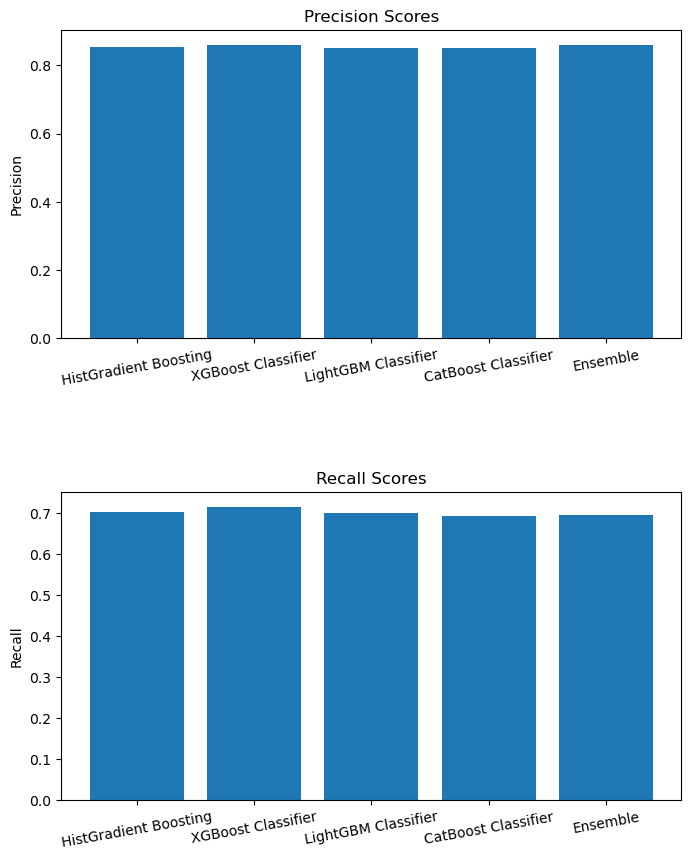

In [ ]:
import matplotlib.pyplot as plt

# Precision scores
precision_scores = [hgb_precision_sp, xgb_precision_sp, lgbm_precision_sp, cat_precision_sp, ensemble_precision_sp]

# Recall scores
recall_scores = [hgb_recall_sp, xgb_recall_sp, lgbm_recall_sp, cat_recall_sp, ensemble_recall_sp]

# Model names
model_names = ['HistGradient Boosting', 'XGBoost Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'Ensemble']

# Create subplots for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot precision scores
ax[0].bar(model_names, precision_scores)
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision Scores')

# Plot recall scores
ax[1].bar(model_names, recall_scores)
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall Scores')

# Rotate x-axis labels
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=10)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


In [ ]:
# Create a copy of the test data with predictions and actual values
results_sp = X_test_sp.copy()
results_sp['actual'] = y_test_sp
results_sp['hgb_pred'] = hgb_pred_sp
results_sp['lgbm_pred'] = lgbm_pred_sp
results_sp['cat_pred'] = cat_pred_sp
results_sp['ensemble_pred'] = ensemble_pred_sp

In [ ]:
# Save the DataFrame to a CSV file
results_cts.to_csv('final_pred_cts.csv', index=False)

Cross-validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
hgb_scores = cross_validate(hgb_model_sp, X_sp_filtered, y_sp_filtered, cv=cv, scoring=scoring, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {hgb_scores["train_balanced_accuracy"][i]:.4f} ± {hgb_scores["train_balanced_accuracy"].std():.4f}')
    print(f'Testing score: {hgb_scores["test_balanced_accuracy"][i]:.4f} ± {hgb_scores["test_balanced_accuracy"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {hgb_scores["train_balanced_accuracy"].mean():.4f} ± {hgb_scores["train_balanced_accuracy"].std():.4f}')
print(f'Mean testing score: {hgb_scores["test_balanced_accuracy"].mean():.4f} ± {hgb_scores["test_balanced_accuracy"].std():.4f}')


Fold 1:
Training score: 0.9403 ± 0.0015
Testing score: 0.8301 ± 0.0091

Fold 2:
Training score: 0.9361 ± 0.0015
Testing score: 0.8419 ± 0.0091

Fold 3:
Training score: 0.9396 ± 0.0015
Testing score: 0.8485 ± 0.0091

Fold 4:
Training score: 0.9376 ± 0.0015
Testing score: 0.8520 ± 0.0091

Fold 5:
Training score: 0.9384 ± 0.0015
Testing score: 0.8559 ± 0.0091

Mean training score: 0.9384 ± 0.0015
Mean testing score: 0.8457 ± 0.0091


In [ ]:
# Define the scoring metric
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
xgb_scores = cross_validate(xgb_model_sp, X_sp_filtered, y_sp_filtered, cv=cv, scoring=scoring, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {xgb_scores["train_balanced_accuracy"][i]:.4f} ± {xgb_scores["train_balanced_accuracy"].std():.4f}')
    print(f'Testing score: {xgb_scores["test_balanced_accuracy"][i]:.4f} ± {xgb_scores["test_balanced_accuracy"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {xgb_scores["train_balanced_accuracy"].mean():.4f} ± {xgb_scores["train_balanced_accuracy"].std():.4f}')
print(f'Mean testing score: {xgb_scores["test_balanced_accuracy"].mean():.4f} ± {xgb_scores["test_balanced_accuracy"].std():.4f}')


Fold 1:
Training score: 0.9775 ± 0.0105
Testing score: 0.8461 ± 0.0033

Fold 2:
Training score: 0.9772 ± 0.0105
Testing score: 0.8500 ± 0.0033

Fold 3:
Training score: 0.9772 ± 0.0105
Testing score: 0.8448 ± 0.0033

Fold 4:
Training score: 0.9820 ± 0.0105
Testing score: 0.8468 ± 0.0033

Fold 5:
Training score: 0.9526 ± 0.0105
Testing score: 0.8540 ± 0.0033

Mean training score: 0.9733 ± 0.0105
Mean testing score: 0.8484 ± 0.0033


In [ ]:
# Define the scoring metric
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
lgbm_scores = cross_validate(lgbm_model_sp, X_sp_filtered, y_sp_filtered, cv=cv, scoring=scoring, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {lgbm_scores["train_balanced_accuracy"][i]:.4f} ± {lgbm_scores["train_balanced_accuracy"].std():.4f}')
    print(f'Testing score: {lgbm_scores["test_balanced_accuracy"][i]:.4f} ± {lgbm_scores["test_balanced_accuracy"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {lgbm_scores["train_balanced_accuracy"].mean():.4f} ± {lgbm_scores["train_balanced_accuracy"].std():.4f}')
print(f'Mean testing score: {lgbm_scores["test_balanced_accuracy"].mean():.4f} ± {lgbm_scores["test_balanced_accuracy"].std():.4f}')


Fold 1:
Training score: 0.9474 ± 0.0031
Testing score: 0.8374 ± 0.0061

Fold 2:
Training score: 0.9448 ± 0.0031
Testing score: 0.8449 ± 0.0061

Fold 3:
Training score: 0.9394 ± 0.0031
Testing score: 0.8486 ± 0.0061

Fold 4:
Training score: 0.9418 ± 0.0031
Testing score: 0.8542 ± 0.0061

Fold 5:
Training score: 0.9396 ± 0.0031
Testing score: 0.8528 ± 0.0061

Mean training score: 0.9426 ± 0.0031
Mean testing score: 0.8476 ± 0.0061


In [ ]:
# Define the scoring metric
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
cat_scores = cross_validate(cat_model_sp, X_sp_filtered, y_sp_filtered, cv=cv, scoring=scoring, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {cat_scores["train_balanced_accuracy"][i]:.4f} ± {cat_scores["train_balanced_accuracy"].std():.4f}')
    print(f'Testing score: {cat_scores["test_balanced_accuracy"][i]:.4f} ± {cat_scores["test_balanced_accuracy"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {cat_scores["train_balanced_accuracy"].mean():.4f} ± {cat_scores["train_balanced_accuracy"].std():.4f}')
print(f'Mean testing score: {cat_scores["test_balanced_accuracy"].mean():.4f} ± {cat_scores["test_balanced_accuracy"].std():.4f}')


Fold 1:
Training score: 0.9245 ± 0.0022
Testing score: 0.8434 ± 0.0032

Fold 2:
Training score: 0.9224 ± 0.0022
Testing score: 0.8368 ± 0.0032

Fold 3:
Training score: 0.9249 ± 0.0022
Testing score: 0.8433 ± 0.0032

Fold 4:
Training score: 0.9251 ± 0.0022
Testing score: 0.8468 ± 0.0032

Fold 5:
Training score: 0.9291 ± 0.0022
Testing score: 0.8434 ± 0.0032

Mean training score: 0.9252 ± 0.0022
Mean testing score: 0.8428 ± 0.0032


In [ ]:
# Define the scoring metric
scoring = {
    'balanced_accuracy': make_scorer(balanced_accuracy_score)
}

# Perform cross-validation
ensemble_scores = cross_validate(ensemble_model_sp, X_sp_filtered, y_sp_filtered, cv=cv, scoring=scoring, return_train_score=True)

# Print the training and testing scores for each fold
for i in range(5):
    print(f'Fold {i+1}:')
    print(f'Training score: {ensemble_scores["train_balanced_accuracy"][i]:.4f} ± {ensemble_scores["train_balanced_accuracy"].std():.4f}')
    print(f'Testing score: {ensemble_scores["test_balanced_accuracy"][i]:.4f} ± {ensemble_scores["test_balanced_accuracy"].std():.4f}')
    print('')

# Print the mean training and testing scores across all folds
print(f'Mean training score: {ensemble_scores["train_balanced_accuracy"].mean():.4f} ± {ensemble_scores["train_balanced_accuracy"].std():.4f}')
print(f'Mean testing score: {ensemble_scores["test_balanced_accuracy"].mean():.4f} ± {ensemble_scores["test_balanced_accuracy"].std():.4f}')


Fold 1:
Training score: 0.9501 ± 0.0032
Testing score: 0.8428 ± 0.0040

Fold 2:
Training score: 0.9455 ± 0.0032
Testing score: 0.8422 ± 0.0040

Fold 3:
Training score: 0.9463 ± 0.0032
Testing score: 0.8477 ± 0.0040

Fold 4:
Training score: 0.9522 ± 0.0032
Testing score: 0.8482 ± 0.0040

Fold 5:
Training score: 0.9432 ± 0.0032
Testing score: 0.8532 ± 0.0040

Mean training score: 0.9475 ± 0.0032
Mean testing score: 0.8468 ± 0.0040


Modeling with stratified sampling by financial statement (fs)

In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
npl_fs = npl_c.drop(columns=['Active Portfolio Indicator'])

In [ ]:
# Separate the features (X) and target variable (y)
X_fs = npl_fs.drop('NPL', axis=1)
y_fs = npl_fs['NPL']

# Split the data into train and test sets using stratified sampling
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, stratify=y_fs, random_state=42)


In [ ]:
# Print the sizes of the train and test sets
print("Train set size:", len(X_fs))
print("Test set size:", len(y_fs))

In [ ]:
# Print the shape of the train and test sets
print('X_train shape:', X_train_fs.shape)
print('X_test shape:', X_test_fs.shape)
print('y_train shape:', y_train_fs.shape)
print('y_test shape:', y_test_fs.shape)

X_train shape: (47870, 39)
X_test shape: (11968, 39)
y_train shape: (47870,)
y_test shape: (11968,)


In [ ]:
# HistGradient Boosting model
hgb_model_fs = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hgb_model_fs.fit(X_train_fs, y_train_fs)
hgb_pred_fs = hgb_model_fs.predict(X_test_fs)
joblib.dump(hgb_model_fs, 'hgb_model_fs.joblib')

# XGBoost Classifier model
xgb_model_fs = XGBClassifier(n_estimators=100, random_state=42)
xgb_model_fs.fit(X_train_fs, y_train_fs)
xgb_pred_fs = xgb_model_fs.predict(X_test_fs)
joblib.dump(xgb_model_fs, 'xgb_model_fs.joblib')

# LightGBM Classifier model
lgbm_model_fs = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model_fs.fit(X_train_fs, y_train_fs)
lgbm_pred_fs = lgbm_model_fs.predict(X_test_fs)
joblib.dump(lgbm_model_fs, 'lgbm_model_fs.joblib')

# CatBoost Classifier model
cat_model_fs = CatBoostClassifier(n_estimators=100, random_state=42, silent=True)
cat_model_fs.fit(X_train_fs, y_train_fs)
cat_pred_fs = cat_model_fs.predict(X_test_fs)
joblib.dump(cat_model_fs, 'cat_model_fs.joblib')

# Ensemble model
ensemble_model_fs = VotingClassifier(estimators=[
    ('hgb', hgb_model_fs), ('xgb', xgb_model_fs), ('lgbm', lgbm_model_fs), ('cat', cat_model_fs)], voting='soft')
ensemble_model_fs.fit(X_train_fs, y_train_fs)
ensemble_pred_fs = ensemble_model_fs.predict(X_test_fs)
joblib.dump(ensemble_model_fs, 'ensemble_model_fs.joblib')


['ensemble_model_fs.joblib']

In [ ]:
# Predict probabilities for positive class
hgb_pred_proba_fs = hgb_model_fs.predict_proba(X_test_fs)[:, 1]
xgb_pred_proba_fs = xgb_model_fs.predict_proba(X_test_fs)[:, 1]
lgbm_pred_proba_fs = lgbm_model_fs.predict_proba(X_test_fs)[:, 1]
cat_pred_proba_fs = cat_model_fs.predict_proba(X_test_fs)[:, 1]
ensemble_pred_proba_fs = ensemble_model_fs.predict_proba(X_test_fs)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_fs, hgb_pred_proba_fs)
hgb_pr_fs = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_fs, xgb_pred_proba_fs)
xgb_pr_fs = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_fs, lgbm_pred_proba_fs)
lgbm_pr_fs = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_fs, cat_pred_proba_fs)
cat_pr_fs = auc(recall, precision)
precision, recall, _ = precision_recall_curve(y_test_fs, ensemble_pred_proba_fs)
ensemble_pr_fs = auc(recall, precision)

# Compute F1 score
hgb_f1_fs = f1_score(y_test_fs, hgb_pred_fs)
xgb_f1_fs = f1_score(y_test_fs, xgb_pred_fs)
lgbm_f1_fs = f1_score(y_test_fs, lgbm_pred_fs)
cat_f1_fs = f1_score(y_test_fs, cat_pred_fs)
ensemble_f1_fs = f1_score(y_test_fs, ensemble_pred_fs)

# Calculate Balanced Accuracy
hgb_balanced_fs = balanced_accuracy_score(y_test_fs, hgb_pred_fs)
xgb_balanced_fs = balanced_accuracy_score(y_test_fs, xgb_pred_fs)
lgbm_balanced_fs = balanced_accuracy_score(y_test_fs, lgbm_pred_fs)
cat_balanced_fs = balanced_accuracy_score(y_test_fs, cat_pred_fs)
ensemble_balanced_fs = balanced_accuracy_score(y_test_fs, ensemble_pred_fs)


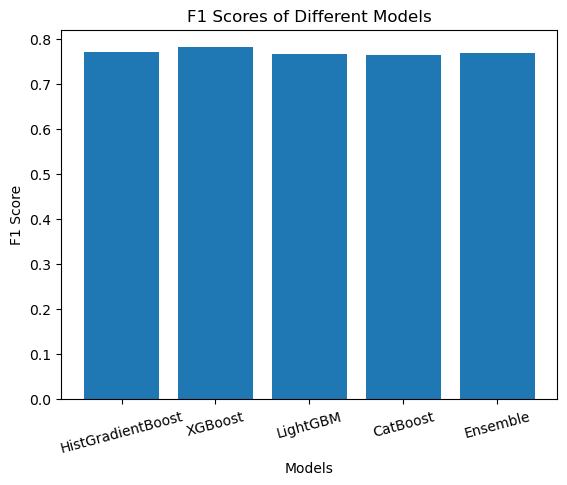

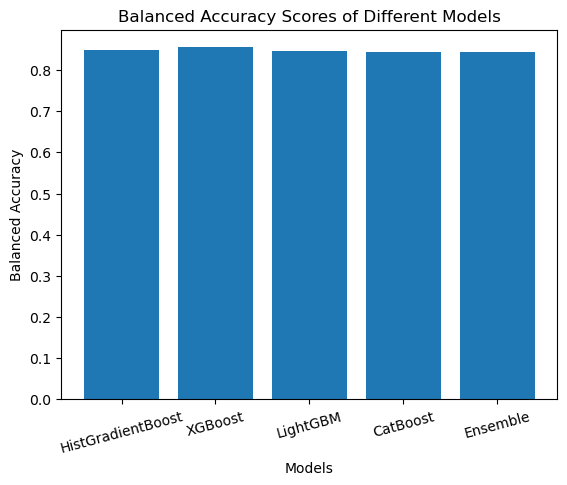

In [ ]:
# Define the models
models_fs = ['HistGradientBoost', 'XGBoost', 'LightGBM', 'CatBoost', 'Ensemble']

# F1 scores
f1_scores = [hgb_f1_fs, xgb_f1_fs, lgbm_f1_fs, cat_f1_fs, ensemble_f1_fs]
plt.bar(models_fs, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores of Different Models')
plt.xticks(rotation=15)  # Rotate the x-axis labels by 45 degrees
plt.show()

# Balanced accuracy scores
balanced_acc_scores = [hgb_balanced_fs, xgb_balanced_fs, lgbm_balanced_fs, cat_balanced_fs, ensemble_balanced_fs]
plt.bar(models_fs, balanced_acc_scores)
plt.xlabel('Models')
plt.ylabel('Balanced Accuracy')
plt.title('Balanced Accuracy Scores of Different Models')
plt.xticks(rotation=15)  # Rotate the x-axis labels by 45 degrees
plt.show()


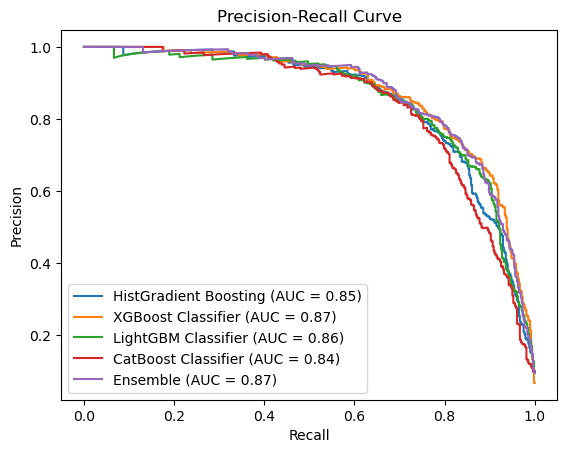

In [ ]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_fs, hgb_pred_proba_fs)
hgb_pr_fs = auc(recall, precision)
plt.plot(recall, precision, label='HistGradient Boosting (AUC = {:.2f})'.format(hgb_pr_fs))

precision, recall, _ = precision_recall_curve(y_test_fs, xgb_pred_proba_fs)
xgb_pr_fs = auc(recall, precision)
plt.plot(recall, precision, label='XGBoost Classifier (AUC = {:.2f})'.format(xgb_pr_fs))

precision, recall, _ = precision_recall_curve(y_test_fs, lgbm_pred_proba_fs)
lgbm_pr_fs = auc(recall, precision)
plt.plot(recall, precision, label='LightGBM Classifier (AUC = {:.2f})'.format(lgbm_pr_fs))

precision, recall, _ = precision_recall_curve(y_test_fs, cat_pred_proba_fs)
cat_pr_fs = auc(recall, precision)
plt.plot(recall, precision, label='CatBoost Classifier (AUC = {:.2f})'.format(cat_pr_fs))

precision, recall, _ = precision_recall_curve(y_test_fs, ensemble_pred_proba_fs)
ensemble_pr_fs = auc(recall, precision)
plt.plot(recall, precision, label='Ensemble (AUC = {:.2f})'.format(ensemble_pr_fs))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for HistGradient Boosting model
hgb_precision_fs = precision_score(y_test_fs, hgb_pred_fs)
hgb_recall_fs = recall_score(y_test_fs, hgb_pred_fs)
print("HistGradient Boosting Model:")
print("Precision:", hgb_precision_fs)
print("Recall:", hgb_recall_fs)
print()

# Calculate precision and recall for XGBoost Classifier model
xgb_precision_fs = precision_score(y_test_fs, xgb_pred_fs)
xgb_recall_fs = recall_score(y_test_fs, xgb_pred_fs)
print("XGBoost Classifier Model:")
print("Precision:", xgb_precision_fs)
print("Recall:", xgb_recall_fs)
print()

# Calculate precision and recall for LightGBM Classifier model
lgbm_precision_fs = precision_score(y_test_fs, lgbm_pred_fs)
lgbm_recall_fs = recall_score(y_test_fs, lgbm_pred_fs)
print("LightGBM Classifier Model:")
print("Precision:", lgbm_precision_fs)
print("Recall:", lgbm_recall_fs)
print()

# Calculate precision and recall for CatBoost Classifier model
cat_precision_fs = precision_score(y_test_fs, cat_pred_fs)
cat_recall_fs = recall_score(y_test_fs, cat_pred_fs)
print("CatBoost Classifier Model:")
print("Precision:", cat_precision_fs)
print("Recall:", cat_recall_fs)
print()

# Calculate precision and recall for Ensemble model
ensemble_precision_fs = precision_score(y_test_fs, ensemble_pred_fs)
ensemble_recall_fs = recall_score(y_test_fs, ensemble_pred_fs)
print("Ensemble Model:")
print("Precision:", ensemble_precision_fs)
print("Recall:", ensemble_recall_fs)


HistGradient Boosting Model:
Precision: 0.8535353535353535
Recall: 0.7027027027027027

XGBoost Classifier Model:
Precision: 0.86
Recall: 0.7151767151767152

LightGBM Classifier Model:
Precision: 0.850632911392405
Recall: 0.6985446985446986

CatBoost Classifier Model:
Precision: 0.8516624040920716
Recall: 0.6923076923076923

Ensemble Model:
Precision: 0.8608247422680413
Recall: 0.6943866943866944


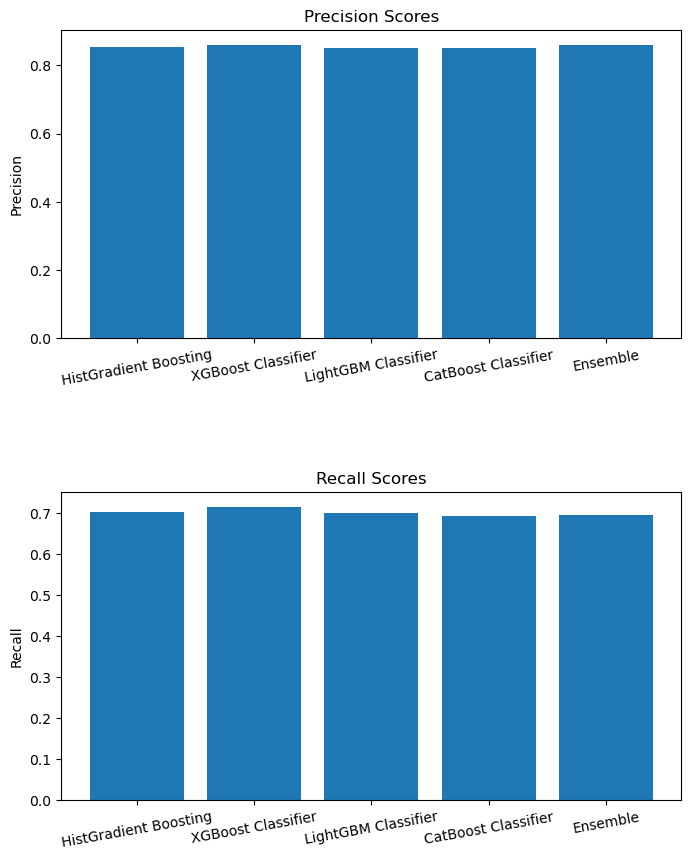

In [ ]:
import matplotlib.pyplot as plt

# Precision scores
precision_scores = [hgb_precision_fs, xgb_precision_fs, lgbm_precision_fs, cat_precision_fs, ensemble_precision_fs]

# Recall scores
recall_scores = [hgb_recall_fs, xgb_recall_fs, lgbm_recall_fs, cat_recall_fs, ensemble_recall_fs]

# Model names
model_names = ['HistGradient Boosting', 'XGBoost Classifier', 'LightGBM Classifier', 'CatBoost Classifier', 'Ensemble']

# Create subplots for precision and recall
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot precision scores
ax[0].bar(model_names, precision_scores)
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision Scores')

# Plot recall scores
ax[1].bar(model_names, recall_scores)
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall Scores')

# Rotate x-axis labels
plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=10)
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()


In [ ]:
# Create a copy of the test data with predictions and actual values
results_fs = X_test_fs.copy()
results_fs['actual'] = y_test_fs
results_fs['hgb_pred'] = hgb_pred_fs
results_fs['lgbm_pred'] = lgbm_pred_fs
results_fs['cat_pred'] = cat_pred_fs
results_fs['ensemble_pred'] = ensemble_pred_fs


In [ ]:
# Save the DataFrame to a CSV file
results_cts.to_csv('final_pred_cts.csv', index=False)

Forecasting future ratios for active client, starting with analysis

In [ ]:
print(npl_c.columns.tolist())

['individual_id', 'quarter', 'year', 'Active Portfolio Indicator', 'Statement Months', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
# Assuming the column name is "individual_id" in the "test" dataframe
unique_npl_c = npl_c["individual_id"].nunique()

print("Total unique values in 'individual_id' column:", unique_npl_c)

Total unique values in 'individual_id' column: 4816


In [ ]:
#test & train data,
test = npl_c.loc[npl_c["Active Portfolio Indicator"] == "Y"]
train = npl_c.loc[npl_c["Active Portfolio Indicator"] == "N"]

In [ ]:
train = train.drop(columns=["Active Portfolio Indicator"])
test = test.drop(columns=["Active Portfolio Indicator"])

In [ ]:
print(test.shape)
print(train.shape)

(15202, 41)
(44636, 41)


In [ ]:
# Assuming the column name is "individual_id" in the "test" dataframe
unique_values = test["individual_id"].nunique()
print("Total unique values in 'individual_id' column:", unique_values)

Total unique values in 'individual_id' column: 751


In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test[test["Statement Months"] == 12])
print("Total number of rows with value 12 in 'statement' column:", count)

Total number of rows with value 12 in 'statement' column: 8497


In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test[test["Statement Months"] == 9])
print("Total number of rows with value 9 in 'statement' column:", count)

Total number of rows with value 9 in 'statement' column: 2007


In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test[test["Statement Months"] == 6])
print("Total number of rows with value 6 in 'statement' column:", count)

Total number of rows with value 6 in 'statement' column: 2298


In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test[test["Statement Months"] == 3])
print("Total number of rows with value 3 in 'statement' column:", count)

Total number of rows with value 3 in 'statement' column: 2185


In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test[test["NPL"] == 1])
print("Total number of rows with NPL:", count)

Total number of rows with NPL: 714


In [ ]:
# Save the DataFrame to a CSV file
test.to_csv('test_Y_cts.csv', index=False)

In [ ]:
print(test.columns.tolist())

['individual_id', 'quarter', 'year', 'Statement Months', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
test_set = test[test['Statement Months'] == 12]

In [ ]:
print(test_set.shape)

(8497, 41)


In [ ]:
# Save the DataFrame to a CSV file
test_set.to_csv('test_set.csv', index=False)

In [ ]:
# Assuming the column name is "statement" in the "test" dataframe
count = len(test_set[test_set["NPL"] == 1])
print("Total number of rows with NPL:", count)

Total number of rows with NPL: 425


In [ ]:
 # Assuming the column name is "statement" in the "test" dataframe
count = len(test_set[test_set["DEBT_CMTD_n"] == 0])
print("Total number of rows with 0 exposue:", count)

Total number of rows with 0 exposue: 0


In [ ]:
# Assuming the column name is "DEBT_CMTD" in the "test_set" dataframe
count = (test_set["DEBT_CMTD_n"] != 0).sum()
print("Total number of rows with a value other than zero:", count)

Total number of rows with a value other than zero: 8497


In [ ]:
test_set = test_set[test_set['DEBT_CMTD_n'] != 0]

In [ ]:
print(test_set.shape)

(8497, 41)


In [ ]:
test_set = test_set[test_set['year'] >= 2010]

In [ ]:
print(test_set.shape)

(8497, 41)


In [ ]:
test_set.isnull().sum()

individual_id                             0
quarter                                   0
year                                      0
Statement Months                          0
CR NUM                                 1121
Partner Region_CAF                        0
Partner Region_CAT                        0
Partner Region_CEA                        0
Partner Region_CEU                        0
Partner Region_CLA                        0
Partner Region_CME                        0
Partner Region_CSA                        0
Partner Region_WLD                        0
Partner Industry_INFRA                    0
Partner Industry_MAS                      0
NPL                                       0
Total Cash and Cash Equivalents_n       516
Total Liabilities_n                     497
Retained Earnings_n                     835
Total Equity_n                           33
Net Revenues_n                          568
Operating Profit_n                       41
Interest Expense_n              

In [ ]:
# Assuming the panel data is stored in a DataFrame called 'test_c'
columns_to_fill = ['Current Ratio_n', 'DSCR (TS)_n', 'ROAA_n', 'Asset Turnover_n',
                   'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'CR NUM', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n',
                   'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n',
                   'NPL_DEBT_CMTD_n', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n',
                   'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n',
                   'Interest Expense_n', 'Income Tax Expense_n', 'Interest Income_n', 'Net Worth to Total Assets_n',
                   'Net Debt_n', 'Interest Coverage_n', 'Net Income_n']

# Sort the panel data by individual_id, year, and quarter
test_set = test_set.sort_values(['individual_id', 'year', 'quarter'])

# Fill missing values with forward fill within each individual_id
filled_test = test_set.copy()
filled_test[columns_to_fill] = filled_test.groupby('individual_id')[columns_to_fill].ffill()

In [ ]:
filled_test.isnull().sum()

individual_id                             0
quarter                                   0
year                                      0
Statement Months                          0
CR NUM                                 1121
Partner Region_CAF                        0
Partner Region_CAT                        0
Partner Region_CEA                        0
Partner Region_CEU                        0
Partner Region_CLA                        0
Partner Region_CME                        0
Partner Region_CSA                        0
Partner Region_WLD                        0
Partner Industry_INFRA                    0
Partner Industry_MAS                      0
NPL                                       0
Total Cash and Cash Equivalents_n        79
Total Liabilities_n                      74
Retained Earnings_n                     141
Total Equity_n                           12
Net Revenues_n                          115
Operating Profit_n                       21
Interest Expense_n              

In [ ]:
# Utilizing backward fill as well
# Sort the panel data by individual_id, year, and quarter
filled_test = filled_test.sort_values(['individual_id', 'year', 'quarter'])

# Fill missing values with backward fill within each individual_id
filled_test_b = filled_test.copy()
filled_test_b[columns_to_fill] = filled_test_b.groupby('individual_id')[columns_to_fill].bfill()

In [ ]:
filled_test_b.isnull().sum()

individual_id                             0
quarter                                   0
year                                      0
Statement Months                          0
CR NUM                                 1121
Partner Region_CAF                        0
Partner Region_CAT                        0
Partner Region_CEA                        0
Partner Region_CEU                        0
Partner Region_CLA                        0
Partner Region_CME                        0
Partner Region_CSA                        0
Partner Region_WLD                        0
Partner Industry_INFRA                    0
Partner Industry_MAS                      0
NPL                                       0
Total Cash and Cash Equivalents_n        32
Total Liabilities_n                      29
Retained Earnings_n                      54
Total Equity_n                            0
Net Revenues_n                           45
Operating Profit_n                        9
Interest Expense_n              

In [ ]:
columns = ['DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'NPL_DEBT_CMTD_n']
filled_test_b.loc[:, columns] = filled_test_b.loc[:, columns].fillna(0)

In [ ]:
filled_test_b.isnull().sum()

individual_id                             0
quarter                                   0
year                                      0
Statement Months                          0
CR NUM                                 1121
Partner Region_CAF                        0
Partner Region_CAT                        0
Partner Region_CEA                        0
Partner Region_CEU                        0
Partner Region_CLA                        0
Partner Region_CME                        0
Partner Region_CSA                        0
Partner Region_WLD                        0
Partner Industry_INFRA                    0
Partner Industry_MAS                      0
NPL                                       0
Total Cash and Cash Equivalents_n        32
Total Liabilities_n                      29
Retained Earnings_n                      54
Total Equity_n                            0
Net Revenues_n                           45
Operating Profit_n                        9
Interest Expense_n              

In [ ]:
from sklearn.impute import KNNImputer

columns_to_impute = ['Current Ratio_n', 'DSCR (TS)_n', 'ROAA_n', 'Asset Turnover_n',
                   'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'CR NUM', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n',
                   'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n',
                   'NPL_DEBT_CMTD_n', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n',
                   'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n',
                   'Interest Expense_n', 'Income Tax Expense_n', 'Interest Income_n', 'Net Worth to Total Assets_n',
                   'Net Debt_n', 'Interest Coverage_n', 'Net Income_n']

imputer = KNNImputer(n_neighbors=3)  # You can adjust the number of neighbors as needed

# Create a copy of the original dataframe
imputed_npl = filled_test_b.copy()

# Perform imputation on the selected columns
imputed_npl[columns_to_impute] = imputer.fit_transform(imputed_npl[columns_to_impute])

# Round the 'CR NUM' column to a whole number
imputed_npl['CR NUM'] = imputed_npl['CR NUM'].round()


In [ ]:
imputed_npl.isnull().sum()

individual_id                          0
quarter                                0
year                                   0
Statement Months                       0
CR NUM                                 0
Partner Region_CAF                     0
Partner Region_CAT                     0
Partner Region_CEA                     0
Partner Region_CEU                     0
Partner Region_CLA                     0
Partner Region_CME                     0
Partner Region_CSA                     0
Partner Region_WLD                     0
Partner Industry_INFRA                 0
Partner Industry_MAS                   0
NPL                                    0
Total Cash and Cash Equivalents_n      0
Total Liabilities_n                    0
Retained Earnings_n                    0
Total Equity_n                         0
Net Revenues_n                         0
Operating Profit_n                     0
Interest Expense_n                     0
Interest Income_n                      0
Income Tax Expen

In [ ]:
# Save the DataFrame to a CSV file
imputed_npl.to_csv('imputed_npl.csv', index=False)

Predicting future ratios

In [ ]:
imputed_npl = imputed_npl.drop(columns=['Statement Months'])

In [ ]:
print(imputed_npl.columns.tolist())

['individual_id', 'quarter', 'year', 'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU', 'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA', 'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n', 'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n', 'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n']


In [ ]:
from sklearn.linear_model import LinearRegression

# Separate the historical data and future years for each panel
future_years = [2023, 2024]
predicted_data = []

# Iterate over unique panel values
for panel in imputed_npl['individual_id'].unique():
    test_data = imputed_npl[imputed_npl['individual_id'] == panel].copy()
    historical_years = test_data['year']
    historical_quarters = test_data['quarter']

    # Check if there are enough historical years available for the panel
    if len(historical_years) < 2:
        continue

    historical_X = test_data[['Current Ratio_n', 'DSCR (TS)_n', 'ROAA_n', 'Asset Turnover_n',
                              'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'CR NUM', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n',
                              'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n',
                              'NPL_DEBT_CMTD_n', 'NPL Days', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n',
                              'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n',
                              'Interest Expense_n', 'Net Debt_n']]
'CR NUM', 'Partner Region_CAF', 'Partner Region_CAT', 'Partner Region_CEA', 'Partner Region_CEU',
'Partner Region_CLA', 'Partner Region_CME', 'Partner Region_CSA', 'Partner Region_WLD', 'Partner Industry_INFRA',
'Partner Industry_MAS', 'NPL', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n',
'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n', 'Interest Expense_n', 'Interest Income_n',
'Income Tax Expense_n', 'Net Income_n', 'Net Debt_n', 'Current Ratio_n', 'Net Worth to Total Assets_n',
'DSCR (TS)_n', 'Interest Coverage_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n',
'WC to Assets Ratio_n', 'RE to Assets Ratio_n', 'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n',
'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n'

    # Fit a linear regression model for each variable
    models = {}
    for column in ['Current Ratio_n', 'DSCR (TS)_n', 'ROAA_n', 'Asset Turnover_n',
                   'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'CR NUM', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n',
                   'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n',
                   'NPL_DEBT_CMTD_n', 'NPL Days', 'Total Cash and Cash Equivalents_n', 'Total Liabilities_n',
                   'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n', 'Operating Profit_n',
                   'Interest Expense_n', 'Net Debt_n']:
        model = LinearRegression()
        model.fit(np.column_stack((historical_years, historical_quarters)), historical_X[column])
        models[column] = model

    # Predict the future values for the panel
    future_X = pd.DataFrame()
    for column, model in models.items():
        future_X[column] = model.predict(np.column_stack((np.repeat(future_years, 4), np.tile(np.arange(1, 5), 2))))

    # Add the panel and year columns to the predicted future values
    future_X['individual_id'] = panel
    future_X['year'] = np.repeat(future_years, 4)
    future_X['quarter'] = np.tile(np.arange(1, 5), 2)
    predicted_data.append(future_X)

# Concatenate the predicted future values for all panels
predicted_df = pd.concat(predicted_data, ignore_index=True)
# Add the predicted future values to the panel dataframe
panel_final = pd.concat([imputed_npl, predicted_df], ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error

columns_to_impute = ['Current Ratio_n', 'DSCR (TS)_n', 'ROAA_n', 'Asset Turnover_n', 'DEBT_CMTD_n', 'LOAN_OUTSTANDING_n', 'CR NUM', 'WC to Assets Ratio_n', 'RE to Assets Ratio_n',
                     'EBIT to Assets Ratio (annualized)_n', 'Equity to Liabilities Ratio_n', 'Rev_Total_Assest_n', 'NPL_DEBT_CMTD_n', 'NPL Days',
                     'Total Cash and Cash Equivalents_n', 'Total Liabilities_n', 'Retained Earnings_n', 'Total Equity_n', 'Net Revenues_n',
                     'Operating Profit_n', 'Interest Expense_n', 'Net Debt_n']

# Merge the predicted values and actual values based on 'individual_id', 'year', and 'quarter'
merged_df = pd.merge(panel_final, imputed_npl, on=['individual_id', 'year', 'quarter'], suffixes=('_predicted', '_actual'))

# Calculate RMSE for each column
rmse_scores = {}

for column in columns_to_impute:
    mse = mean_squared_error(merged_df[column + '_actual'], merged_df[column + '_predicted'])
    rmse = np.sqrt(mse)
    rmse_scores[column] = rmse

# Print the RMSE scores
for column in columns_to_impute:
    print(f"RMSE for {column}: {rmse_scores[column]}")


In [ ]:
print(panel_final.shape)

In [ ]:
print(panel_final.tail(10))

In [ ]:
test_used = panel_final[panel_final['year'] > 2022]

In [ ]:
print(test_used.shape)

In [ ]:
print(test_used.head(10))

In [ ]:
# Save the DataFrame to a CSV file
test_used.to_csv('test_used.csv', index=False)

Predicting future npl

In [ ]:
test_fu = test_used.drop(columns=["NPL"])

In [ ]:
print(test_fu.shape)

In [ ]:
import joblib

# Load the saved models
hgb_model_cts = joblib.load('hgb_model_cts.joblib')
xgb_model_cts = joblib.load('xgb_model_cts.joblib')
lgbm_model_cts = joblib.load('lgbm_model_cts.joblib')
cat_model_cts = joblib.load('cat_model_cts.joblib')
ensemble_model_cts = joblib.load('ensemble_model_cts.joblib')

# Make predictions on the test_grp dataframe
hgb_pred_cts = hgb_model_cts.predict(test_fu)
xgb_pred_cts = xgb_model_cts.predict(test_fu)
lgbm_pred_cts = lgbm_model_cts.predict(test_fu)
cat_pred_cts = cat_model_cts.predict(test_fu)
ensemble_pred_cts = ensemble_model_cts.predict(test_fu)

# Create a results dataframe
results_fu = test_fu.copy()
results_fu['hgb_pred'] = hgb_pred_cts
results_fu['xgb_pred'] = xgb_pred_cts
results_fu['lgbm_pred'] = lgbm_pred_cts
results_fu['cat_pred'] = cat_pred_cts
results_fu['ensemble_pred'] = ensemble_pred_cts


In [ ]:
results_fu.shape

In [ ]:
# Assuming the column names are "NPL", "TCG", and "GIT" in the "result_fu" dataframe
hgb_pred = len(results_fu[results_fu['hgb_pred'] == 1])
xgb_pred = len(results_fu[results_fu['xgb_pred'] == 1])
lgbm_pred = len(results_fu[results_fu['lgbm_pred'] == 1])
cat_pred = len(results_fu[results_fu['cat_pred'] == 1])
ensemble_pred = len(results_fu[results_fu['ensemble_pred'] == 1])


print("Total number of rows with hgb:", hgb_pred)
print("Total number of rows with xgb:", xgb_pred)
print("Total number of rows with lgbm:", lgbm_pred)
print("Total number of rows with cat:", cat_pred)
print("Total number of rows with ensemble:", ensemble_pred)


In [ ]:
# Assuming the column names are 'hgb_pred', 'xgb_pred', 'lgbm_pred', 'cat_pred', and 'ensemble_pred' in the 'results_fu' dataframe
results_fu_retained = results_fu[
    (results_fu['hgb_pred'] == 1) |
    (results_fu['xgb_pred'] == 1) |
    (results_fu['lgbm_pred'] == 1) |
    (results_fu['cat_pred'] == 1) |
    (results_fu['ensemble_pred'] == 1)
].copy()


In [ ]:
results_fu_retained = results_fu[
    (results_fu[['hgb_pred', 'xgb_pred', 'lgbm_pred', 'cat_pred', 'ensemble_pred']] == 1).any(axis=1)
].copy()


In [ ]:
results_fu_retained.shape

In [ ]:
print(results_fu_retained)

In [ ]:
# Assuming the column name is "individual_id" in the "test" dataframe
unique_values = results_fu_retained["individual_id"].nunique()
print("Total unique values in 'individual_id' column:", unique_values)

In [ ]:
# Assuming the column name is "individual_id" in the "results_fu_retained" dataframe
unique_values_2023 = results_fu_retained[results_fu_retained["year"] == 2023]["individual_id"].nunique()
unique_values_2024 = results_fu_retained[results_fu_retained["year"] == 2024]["individual_id"].nunique()

print("Total unique values in 'individual_id' column for 2023:", unique_values_2023)
print("Total unique values in 'individual_id' column for 2024:", unique_values_2024)


In [ ]:
# Assuming the column name is "individual_id" in the "results_fu_retained" dataframe
unique_ids = results_fu_retained["individual_id"].unique()
unique_ids_list = ', '.join(str(id) for id in unique_ids)
print("Unique values in 'individual_id' column:", unique_ids_list)


In [ ]:
results_fu_all = results_fu_retained[
    (results_fu['hgb_pred'] == 1) &
    (results_fu['xgb_pred'] == 1) &
    (results_fu['lgbm_pred'] == 1) &
    (results_fu['cat_pred'] == 1) &
    (results_fu['ensemble_pred'] == 1)
].copy()


In [ ]:
results_fu_all.shape

In [ ]:
unique_values_all = results_fu_all["individual_id"].nunique()
print("Total unique values in 'individual_id' column:", unique_values_all)

In [ ]:
# Assuming the column name is "individual_id" in the "results_fu_retained" dataframe
unique_ids_all = results_fu_all["individual_id"].unique()
unique_ids_list = ', '.join(str(id) for id in unique_ids)

print("Unique values in 'individual_id' column:", unique_ids_list)

In [ ]:
# Assuming the column name is "individual_id" in the "results_fu_retained" dataframe
unique_ids = results_fu_all["individual_id"].unique()
unique_ids_list = ', '.join(str(id) for id in unique_ids)

# Create a dataframe with the unique values
unique_ids_df = pd.DataFrame({'Unique IDs': unique_ids})

print("Unique values in 'individual_id' column:")
print(unique_ids_df)

In [ ]:
# Save the DataFrame to a CSV file
unique_ids_df.to_csv('unique_ids_df.csv', index=False)

In [ ]:
list1 = [52907, 53108, 54374, 543266, 565353, 567734, 572719, 574958, 593024, 614220, 616679, 618824, 621664, 623327, 633389, 635239, 647468, 651804, 660324, 666344, 674604, 678664, 680425, 689064, 695144, 697924, 720469, 724508, 735127, 737219, 740499, 741046, 741244, 742584, 742949, 743752, 743848, 747744, 747848, 751151, 755417, 759532, 763244, 766526, 766971, 768222, 768574, 774725, 775431, 776646, 781218, 785686, 791365, 792909, 799731, 802942, 803695, 803696, 803844, 811854, 814241, 1004739, 1009051, 1022378]
list2 = [50315, 51900, 52907, 52971, 53108, 54374, 543266, 565353, 567734, 572015, 572719, 574958, 593024, 614220, 616679, 618824, 619846, 620657, 621664, 623068, 623327, 630947, 633389, 635239, 644885, 647468, 651804, 660324, 666344, 674604, 678664, 680425, 684570, 689064, 691229, 695144, 697924, 698944, 699647, 716387, 720469, 724508, 730864, 732665, 735127, 737219, 740499, 741046, 741244, 742584, 742949, 743752, 743848, 746145, 747744, 747848, 751151, 755417, 757225, 759532, 763244, 766526, 766971, 768222, 768574, 769563, 770956, 774725, 775431, 776646, 781218, 785686, 791365, 792909, 799731, 802942, 803694, 803695, 803696, 803844, 808278, 811854, 814241, 1004739, 1009051, 1009855, 1015045, 1021900, 1021985, 1022378, 1036086]

list1_unique = set(list1) - set(list2)
list2_unique = set(list2) - set(list1)

In [ ]:
print(list1_unique)

In [ ]:
print(list2_unique)

In [ ]:
partner_ids = [52907, 53108, 54374, 543266, 565353, 567734, 572719, 574958, 593024, 614220, 616679, 618824, 621664, 623327, 633389, 635239, 647468, 651804, 660324, 666344, 674604, 678664, 680425, 689064, 695144, 697924, 720469, 724508, 735127, 737219, 740499, 741046, 741244, 742584, 742949, 743752, 743848, 747744, 747848, 751151, 755417, 759532, 763244, 766526, 766971, 768222, 768574, 774725, 775431, 776646, 781218, 785686, 791365, 792909, 799731, 802942, 803695, 803696, 803844, 811854, 814241, 1004739, 1009051, 1022378]

partner_names = npl_data[npl_data['Partner ID'].isin(partner_ids)]['Partner Name'].unique()

npl_clients = pd.DataFrame({'Partner ID': partner_ids, 'Partner Name': partner_names})


In [ ]:
print(npl_clients)

In [ ]:
# Save the DataFrame to a CSV file
npl_clients.to_csv('npl_clients.csv', index=False)

In [ ]:
partner_names.shape

In [ ]:
print(partner_names)

In [ ]:
partner_ids2 = [1015045, 50315, 770956, 644885, 684570, 769563, 691229, 1021985, 746145, 630947, 1036086, 51900, 1009855, 698944, 619846, 1021900, 808278, 623068, 716387, 757225, 52971, 803694, 572015, 730864, 620657, 732665, 699647]

partner_names2 = npl_data[npl_data['Partner ID'].isin(partner_ids2)]['Partner Name'].unique()

npl_clients2 = pd.DataFrame({'Partner ID': partner_ids2, 'Partner Name': partner_names2})


In [ ]:
print(npl_clients2)

In [ ]:
# Save the DataFrame to a CSV file
npl_clients2.to_csv('npl_clients2.csv', index=False)

Identifying drivers of model output

In [ ]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(hgb_model_fs)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_fs)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_test_fs)


In [ ]:
import lime
import lime.lime_tabular

# Create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_fs.values, feature_names=X_train_fs.columns)

# Generate explanations for the test data
explanations = explainer.explain_instance(X_test_fs.values, xgb_model_fs.predict_proba, num_features=len(X_train_fs.columns))

# Visualize the LIME explanation
explanations.show_in_notebook()


In [ ]:
import shap
import lime
import lime.lime_tabular
import joblib

# Load the trained models
hgb_model_crd = joblib.load('hgb_model_crd.joblib')
xgb_model_crd = joblib.load('xgb_model_crd.joblib')
lgbm_model_crd = joblib.load('lgbm_model_crd.joblib')
cat_model_crd = joblib.load('cat_model_crd.joblib')
ensemble_model_crd = joblib.load('ensemble_model_crd.joblib')

# Initialize SHAP explainer
explainer = shap.Explainer(ensemble_model_crd)

# Create a SHAP summary plot for the ensemble model
shap_values = explainer(X_train_crd)
shap.summary_plot(shap_values, X_train_crd, plot_type='bar')

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_crd, mode='classification')

# Select a random instance from the test set for LIME explanation
instance_idx = 0  # Change the index according to your requirement
instance = X_test_crd.iloc[[instance_idx]]
explanation_lime = explainer_lime.explain_instance(instance.values[0], ensemble_model_crd.predict_proba)

# Print LIME explanation for the selected instance
explanation_lime.show_in_notebook(show_table=True)
